# E1 rock scissor paper program

### 00 package import
#### tensorflow
* 딥러닝 모델을 위한 패키지, 모델 설계, 학습, 예측 등
#### numpy
* 데이터셋 처리 및 각종 수학 관련
#### PIL
* 이미지 처리
#### OS
* 경로 관련 패키지
#### glob
* 폴더 관련 패키지
#### math
* 수학 관련 패키지
#### matplotlib
* 이미지 출력 패키지
#### random
* 랜덤 관련 패키지

In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os, glob
import math
import matplotlib.pyplot as plt
import random

### 01 fucntion define

In [3]:
def createFolder(directory):
    """
    * resize 할 때 raw data를 수정한 data를 저장할 폴더를 저장
    1. 지정한 파일 경로에 만들려고 하는 폴더가 있는지 확인
    2. 이미 지정한 폴더명이 없으면 새로운 폴더를 생성
    3. 지정한 폴더명이 있거나 폴더를 생성하는데 문제가 발생하면 error 메시지를 출력
    """
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

def resize_images(img_path,target_size):
    """
    * 폴더 경로를 입력받아 하위의 이미지(.jpg)를 원하는 사이즈로 변경하는 fucntion
    - 매개변수 : 이미지가 있는 파일경로, 변경하고 싶은 이미지 사이즈
    1. 이미지 경로를 입력 받아 하위의 ".jpg"로 끝나는 파일들 읽기(파일 경로 형태)
    2. 입력 경로 하위에 "resized"라는 폴더 생성(createFolder)
    3. 1에서 받은 이미지경로를 하나씩 불러 들어서 열어 이미지 사이즈 변경 후 저장
        - PIL.Image - resize(원하는 파일 사이즈, 변경 방법 : ANTIANLIAS(해상도를 낮추는 작업시 생기는 계단 현상을 최소화))
    """
    images=glob.glob(img_path + "/*.jpg")  
    createFolder(os.path.join(img_path,"resized"))
    print(len(images), " images to be resized.")

    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img_path+'/resized/'+img[len(img_path):], "JPEG")
    
    print(len(images), " images resized.")
    
def load_data(img_path, img_size, color=3):
    """
    * img_path 폴더 안의 이미지를 numpy 배열에 저장 
    1. 4차원(데이터수, 이미지 사이즈(row), 이미지 사이즈(col), color)과 라벨을 저장할 1차원(데이터수) numpy 배열 생성
    2. 가위바위보 마다 for loop를 돌며 데이터 배열과 라벨 배열에 저장
        - 데이터 배열 : 이미지 / 라벨 배열 : 라벨값
        - dtype = np.int32 : 32비트 정수 표현 방식으로 저장
        - iglob() : 이터레이터 형식으로 불러드림 - 사용할 때 데이터 읽기
    """
    number_of_data = len([x for x in glob.glob(img_path+'/*/resized/*.jpg')])
    imgs = np.zeros(number_of_data*img_size[0]*img_size[1]*color,dtype=np.int32).reshape(number_of_data,img_size[0],img_size[1],color)
    labels = np.zeros(number_of_data,dtype=np.int32)
    idx=0
    
    for file in glob.iglob(img_path+'/scissor/resized/*.jpg'): 
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=0 
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/resized/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=1 
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/resized/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2 
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels    

### 02 hyper parameter setting

In [4]:
image_size = (56,56)
color = 3

# model hyper parameter
n_channel_1=16
n_channel_2=32
n_dense=16
n_train_epoch=50

### 03 image resize

In [5]:
# 03 이미지 사이즈 조정
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path,image_size)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path,image_size)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path,image_size)

1500  images to be resized.
1500  images resized.
1500  images to be resized.
1500  images resized.
1500  images to be resized.
1500  images resized.


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path,image_size)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path,image_size)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path,image_size)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


### 04 data load

In [7]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path,image_size,color)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4500 입니다.
x_train shape: (4500, 56, 56, 3)
y_train shape: (4500,)


In [104]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path,image_size,color)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 56, 56, 3)
y_test shape: (300,)


라벨:  0


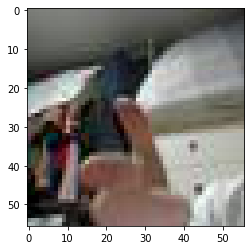

In [9]:
plt.imshow(x_train[1499])
print('라벨: ', y_train[1499])

### 05 model building
* 기본 LeNet의 형태를 사용
* kears의 Sequential 모델 형태를 사용 : 설계 편리성, input layer 선언 불필요(첫 층에서 input형태 선언)
* 7개의 층으로 구성
* Conv2D : 2차원 이미지를 위한 Convolution layer (필터수, 필터크기, activation)
    - 필터수는 컴퓨팅 파워에 맞게 설정 다다익선
    - 필터크기는 필터 통과 이후의 이미지 사이즈 결정(이미지 크기 - 필터크기 +1) padding이 없는 경우
    - activation은 이미지 처리에서 효과적인 relu를 사용
* MaxPool2D : 2차원 이미지에서 일정 영역에서 특정값(최대값)만 추출하는 layer (pooling 할 영역)
    - pooling 영역이 (2,2)인 곳에서 최대값만 추출
* Flatten : 2차원의 배열을 1차원으로 정렬하는 layer
    - row를 하나씩 뽑아서 옆으로 붙이는 방법
* Dense : 기본 딥러닝 노드

In [100]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=image_size+(3,)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 54, 54, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                73744     
_________________________________________________________________
dense_17 (Dense)             (None, 3)               

### 06 model training
* model.compile를 통해 학습 방식 설정
* optimizer : 모델 내의 가중치 수정시 loss를 감소시키는 알고리즘 
    - adam : 가장 대중적으로 사용중인 optimizer, 일반적으로 성능이 좋음
* loss : target값과 predict값 사이에 차이를 계산하는 방법
    - sparse_categorical_crossentropy : 다중 분류시 사용하는 손실 함수
* 이미지내의 픽셀값이 0에서 255의 값을 가지고 있기 때문에 255로 나눠서 0~1사의 값으로 일반화
* 이미지 배열에서 가위 바위 보 순으로 입력되어 있기 때문에 shuffle 하여 사용
* overfitting 방지와 평가를 위한 validation_split을 사용

In [126]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련 
model.fit(x_train/255.0, y_train, shuffle=True, validation_split =0.2, epochs=n_train_epoch)

Epoch 1/50
113/113 [==============================] - 1s 6ms/step - loss: 1.0262e-07 - accuracy: 1.0000 - val_loss: 1.0331e-08 - val_accuracy: 1.0000
Epoch 2/50
113/113 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9928 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/50
113/113 [==============================] - 0s 4ms/step - loss: 1.2099e-04 - accuracy: 1.0000 - val_loss: 2.3398e-04 - val_accuracy: 1.0000
Epoch 4/50
113/113 [==============================] - 0s 4ms/step - loss: 5.5924e-05 - accuracy: 1.0000 - val_loss: 1.2821e-04 - val_accuracy: 1.0000
Epoch 5/50
113/113 [==============================] - 0s 4ms/step - loss: 3.0787e-05 - accuracy: 1.0000 - val_loss: 5.2451e-05 - val_accuracy: 1.0000
Epoch 6/50
113/113 [==============================] - 0s 4ms/step - loss: 1.8991e-05 - accuracy: 1.0000 - val_loss: 3.7430e-05 - val_accuracy: 1.0000
Epoch 7/50
113/113 [==============================] - 0s 4ms/step - loss: 1.2374e-05 - accuracy: 1.0000 - va

### 08 model evaluate
* x_test와 y_test를 사용해서 모델 평가
* loss와 accuacy 산출

In [127]:
test_loss, test_accuracy = model.evaluate(x_test/255.0,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.4799 - accuracy: 0.6267
test_loss: 3.479933977127075 
test_accuracy: 0.6266666650772095


### 09 모델 결과 확인

In [130]:
predicted_result = model.predict(x_test/255.0)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0308223e-02 9.8890918e-01 7.8259635e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


### 10 예측 실패한 결과 확인

예측확률분포: [0.00357519 0.89540416 0.10102071]
라벨: 0, 예측결과: 1


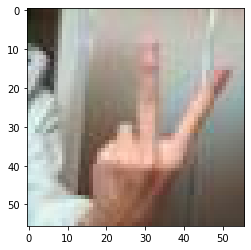

예측확률분포: [1.9806189e-06 8.5246813e-01 1.4752991e-01]
라벨: 2, 예측결과: 1


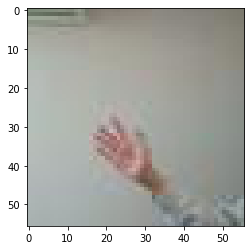

예측확률분포: [1.6815106e-06 9.0370166e-01 9.6296571e-02]
라벨: 2, 예측결과: 1


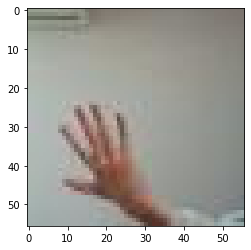

예측확률분포: [3.2117987e-06 8.7052798e-01 1.2946875e-01]
라벨: 2, 예측결과: 1


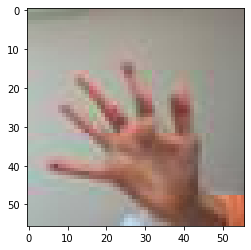

예측확률분포: [6.7311532e-08 9.9784780e-01 2.1521405e-03]
라벨: 0, 예측결과: 1


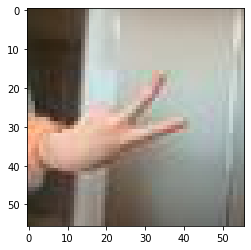

In [131]:
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 결론

### - 모델 정확도 약 62%
### - 모델을 수정하지 않는 선에서 이미지 추가, 파라미터 변경 등을 수행한 결과 높지 않은 정확도 산출
### - 이미지 수를 증가 시켰을 때 가장 높은 정확도 향상
### - LeNet의 한계 
* trian과 test의 배경이 달라질 수록 acurracy가 떨어지는 현상
* 손의 정보를 인식하기 위해 분광학적으로나 형상학적으로나 부족한 모델성능인 것 같음
* train과정에서 overfitting이 일어난 것 같아 이를 해결하기 위한 방법이 필요함